# Generowanie danych

In [21]:

import numpy as np

"""

Funkcja generująca nam zestaw danych testowych:

-> dwie grupy punktow - jedna w cwiartce I, druga w cwiartce III
-> dodatkowo punkty z obu grup wchodzace do cwiartki II i IV

"""

# Kazda z grup dzielimy na 3 cwiartki:
# a1(I), a2(II), a3(IV)
# b1(III), b2(II), b3(IV)
# i losujemy dla kazdej cwiartki punkty

a1 = 2*(np.random.rand(200,2))
a2 = 2*(np.random.rand(200,2))
a3 = 2*(np.random.rand(200,2))
b1 = -2*(np.random.rand(200,2))
b2 = -2*(np.random.rand(200,2))
b3 = -2*(np.random.rand(200,2))

# Zamiana wspolrzednych tak, aby punkty 
# z danego obszaru znajdowaly sie w 
# odpowiedniej cwiartce
for x in a2[:]:
    x[1] = x[1]*(-1)
    
for x in a3[:]:
    x[0] = x[0]*(-1)

for x in b2[:]:
    x[1] = x[1]*(-1)

for x in b3[:]:
    x[0] = x[0]*(-1)

# Za pomoca funkcji y = -0.5*x oraz y=2*x 
# ograniczamy zbior punktow poprzez dodanie
# spelniajacych zalozenia do nowej tabeli bis
a2bis = []
for x in a2:
    if(x[1]>=(-0.5 * x[0])):
        a2bis.append(x)

a3bis = []
for x in a3:
    if(x[1]>=(-2 * x[0])):
        a3bis.append(x)   
        
b2bis = []
for x in b2:
    if(x[1]<(-0.5 * x[0])):
        b2bis.append(x)

b3bis = []
for x in b3:
    if(x[1]<(-2 * x[0])):
        b3bis.append(x)

# 
for i in range(0,len(a2bis),1):
    a1 = np.vstack([a1, a2bis[i]])
for i in range(0,len(a3bis),1):
    a1 = np.vstack([a1, a3bis[i]])

# przesuwnie pierwszego zbiru
# powpoduje ze sie nachodza
a1= a1-0.3

a1 = np.append(a1, np.ones((len(a1), 1)), axis=1)


for i in range(0,len(b2bis),1):
    b1 = np.vstack([b1, b2bis[i]])
for i in range(0,len(b3bis),1):
    b1 = np.vstack([b1, b3bis[i]])

# przesuwanie drugiego zbioru
# powoduje ze sie nachodza
b1=b1-0.1
b1 = np.append(b1, np.zeros((len(b1), 1)), axis=1)

B = np.vstack([a1,b1])

In [22]:
B

array([[ 0.65935935, -0.10267593,  1.        ],
       [ 1.51548541, -0.17033547,  1.        ],
       [ 0.65791162,  0.69561729,  1.        ],
       ...,
       [-0.00703096, -0.6102074 ,  0.        ],
       [ 0.22699073, -1.18977809,  0.        ],
       [ 0.54850908, -1.91841469,  0.        ]])

# Wyświetlenie danych klas

<IPython.core.display.Javascript object>


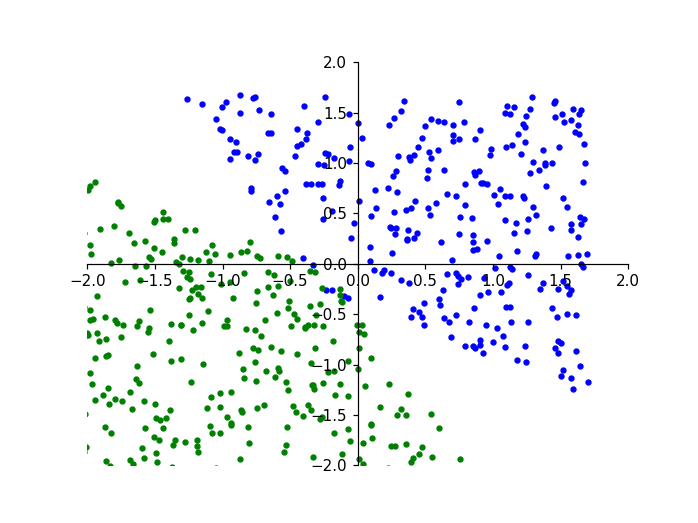

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

for x in B:
    if x[2]==0.:
        plt.scatter(x[0],x[1], s=10, c="green")
    else:
        plt.scatter(x[0],x[1], s=10, c="blue")

plt.show()

# Import modółów

In [24]:
from populacja import Populacja

# Stworznie 5 niezaleznych populacji

In [25]:
populacja = []
populacja.append(Populacja(lam=30, mi=20, data=B, pm=0.3))
populacja.append(Populacja(lam=20, mi=15, data=B, pm=0.25))
populacja.append(Populacja(lam=40, mi=17, data=B, pm=0.55))
populacja.append(Populacja(lam=22, mi=10, data=B, pm=0.45))
populacja.append(Populacja(lam=60, mi=11, data=B, pm=0.21))



<IPython.core.display.Javascript object>


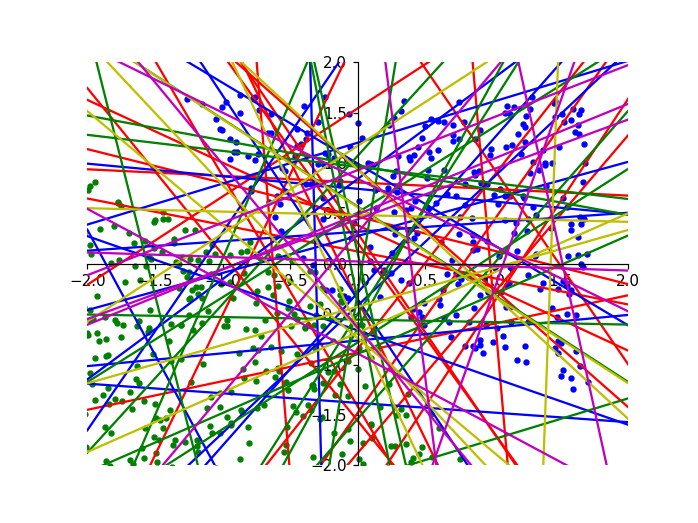

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for os in populacja[0].populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r')
for os in populacja[1].populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-b')
for os in populacja[2].populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-g')
for os in populacja[3].populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-y')
for os in populacja[4].populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-m')
x = np.linspace(-2,2,20)
for x in B:
    if x[2]==0.:
        plt.scatter(x[0],x[1], s=10, c="green")
    else:
        plt.scatter(x[0],x[1], s=10, c="blue")

plt.show()

# Jedna iteracjia w danej populacji

In [27]:
populacja[0].krzyzowanie()
populacja[0].selekcja_loss_2()

# Wyświtlenie populacji[0] i potomkow

<IPython.core.display.Javascript object>


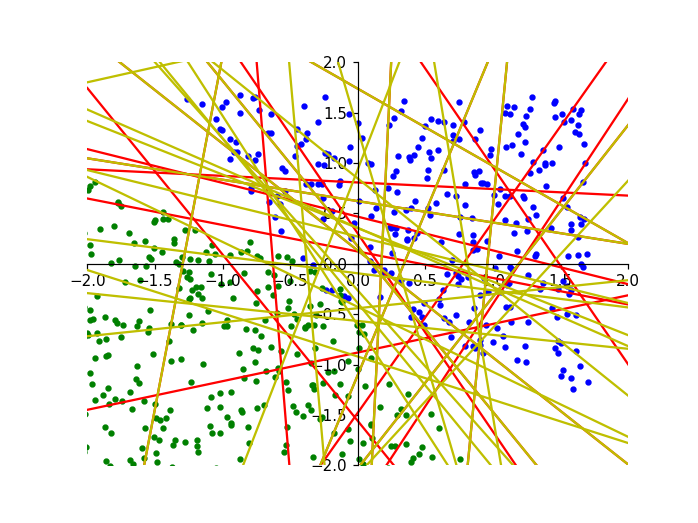

In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for os in populacja[0].populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r')
for os in populacja[0].populacja_potomkow:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-y')
x = np.linspace(-2,2,20)
for x in B:
    if x[2]==0.:
        plt.scatter(x[0],x[1], s=10, c="green")
    else:
        plt.scatter(x[0],x[1], s=10, c="blue")

plt.show()

# Przeście 15 pokoleń dla wszystkich populacji

In [29]:
for pop in populacja:
    print("zrobini")
    for x in range(0, 15, 1):
        pop.krzyzowanie_interpolacja()
        pop.selekcja_loss_1()

zrobini
zrobini
zrobini
zrobini
zrobini


# wizualizacja ułożenia wszystkich populacji po iteracjach

<IPython.core.display.Javascript object>


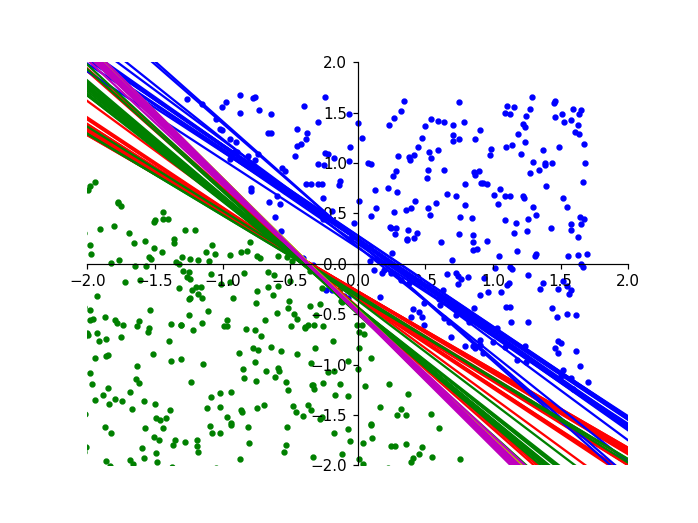

In [30]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for os in populacja[0].populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r')
for os in populacja[1].populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-b')
for os in populacja[2].populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-g')
for os in populacja[3].populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-y')
for os in populacja[4].populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-m')
x = np.linspace(-2,2,20)
for x in B:
    if x[2]==0.:
        plt.scatter(x[0],x[1], s=10, c="green")
    else:
        plt.scatter(x[0],x[1], s=10, c="blue")

plt.show()